In [1]:
# A study on 2-layered network for MNIST dataset. The idea is to explore 
# First layer (large number of neurons) & Second layer (small number of neurons)

import keras
from keras import layers
from keras import models
import numpy as np
import time
from matplotlib import pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical

# load mnist data 
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
print("data_train-size=", data_train.shape)
print("data_test-size=", data_test.shape)

train_images = np.reshape(data_train, (60000,28*28))
test_images = np.reshape(data_test, (10000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

print("train_images-size=", train_images.shape)
print("test_images-size=", test_images.shape)

train_image_labels =  to_categorical(labels_train)
test_image_labels =  to_categorical(labels_test)

print("train_images_labels=", train_image_labels.shape)
print("test_images_labels=", test_image_labels.shape)

Using TensorFlow backend.


data_train-size= (60000, 28, 28)
data_test-size= (10000, 28, 28)
train_images-size= (60000, 784)
test_images-size= (10000, 784)
train_images_labels= (60000, 10)
test_images_labels= (10000, 10)


In [3]:
first_hidden_units_list = [512, 1024, 2048, 4096]
second_hidden_units_list = [2, 4, 8, 16]

execution_time = []
accuracies = []
losses = []
EPOCHS = 5

for index in range(4):
    start_time = time.time()
    model = models.Sequential()
    model.add(layers.Dense(first_hidden_units_list[index], activation = 'relu', input_shape=(784,) ))
    model.add(layers.Dense(second_hidden_units_list[index], activation = 'relu' ))
    model.add(layers.Dense(10, activation = 'softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(train_images, train_image_labels, epochs=EPOCHS)
    test_loss, test_acc = model.evaluate(test_images, test_image_labels)
    stop_time = time.time()
    average_execution_time = (stop_time - start_time)/EPOCHS
    execution_time.append(average_execution_time)
    accuracies.append(test_acc)
    losses.append(test_loss)
    print ("Num first_hidden_units=", first_hidden_units_list[index], 
           "Num second_hidden_units=", second_hidden_units_list[index], 
           ", test_loss=", test_loss, ", test_acc=", test_acc, ", average-time=", average_execution_time )        

Epoch 1/5
60000/60000 [==============================] - 10s 164us/step - loss: 1.3270 - acc: 0.5363
Epoch 2/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.9259 - acc: 0.6791
Epoch 3/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.7357 - acc: 0.7497
Epoch 4/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.5797 - acc: 0.8331
Epoch 5/5
10000/10000 [==============================] - 0s 34us/step
Num first_hidden_units= 512 Num second_hidden_units= 2 , test_loss= 0.5043222984313965 , test_acc= 0.8799 , average-time= 9.756240081787109
Epoch 1/5
60000/60000 [==============================] - 21s 355us/step - loss: 0.7864 - acc: 0.7706
Epoch 2/5
60000/60000 [==============================] - 19s 317us/step - loss: 0.2263 - acc: 0.9540
Epoch 3/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.1462 - acc: 0.9676
Epoch 4/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.1

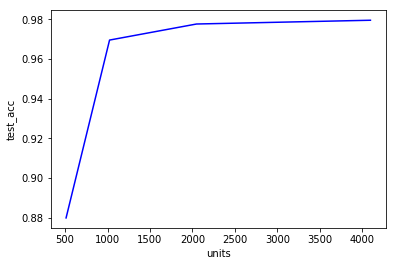

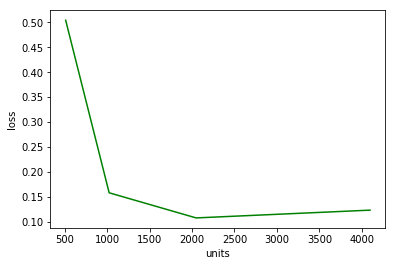

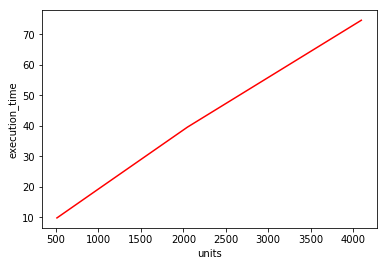

In [5]:
plt.plot(first_hidden_units_list, accuracies, 'b')
plt.xlabel("units")
plt.ylabel("test_acc")
plt.show()

plt.plot(first_hidden_units_list, losses, 'g')
plt.xlabel("units")
plt.ylabel("loss")
plt.show()

plt.plot(first_hidden_units_list, execution_time, 'r')
plt.xlabel("units")
plt.ylabel("execution_time")

plt.show()